<a href="https://www.kaggle.com/code/ayushkumar1979/notebook9eae1ea67a?scriptVersionId=219975738" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-ultimate-metrics-features-and-metadata/Top Movies (Raw Data).csv
/kaggle/input/movies-ultimate-metrics-features-and-metadata/Top Movies (Cleaned Data).csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path="/kaggle/input/movies-ultimate-metrics-features-and-metadata/Top Movies (Raw Data).csv"
df=pd.read_csv(file_path)
print(df.head())

  Unnamed: 0 ReleaseDate                                    Movie  \
0          1   16-Dec-15     Star Wars Ep. VII: The Force Awakens   
1          2    9-Dec-22                 Avatar: The Way of Water   
2          3   28-Jun-23    Indiana Jones and the Dial of Destiny   
3          4   23-Apr-19                        Avengers: Endgame   
4          5   21-May-25  Mission: Impossible—The Final Reckoning   

  ProductionBudget  DomesticGross   WorldwideGross  \
0    $533,200,000   $936,662,225   $2,056,046,835    
1    $460,000,000   $684,075,767   $2,315,589,775    
2    $402,300,000   $174,480,468     $383,963,057    
3    $400,000,000   $858,373,000   $2,748,242,781    
4    $400,000,000             $0               $0    

                                           Movie URL Domestic Box Office  \
0  https://www.the-numbers.com/movie/Star-Wars-Ep...       $936,662,225    
1  https://www.the-numbers.com/movie/Avatar-The-W...       $684,075,767    
2  https://www.the-numbers.com/m

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       6569 non-null   object
 1   ReleaseDate                      6569 non-null   object
 2   Movie                            6569 non-null   object
 3   ProductionBudget                 6569 non-null   object
 4   DomesticGross                    6569 non-null   object
 5   WorldwideGross                   6569 non-null   object
 6   Movie URL                        6569 non-null   object
 7   Domestic Box Office              5847 non-null   object
 8   International Box Office         5044 non-null   object
 9   Worldwide Box Office             5044 non-null   object
 10  Est. Domestic DVD Sales          2566 non-null   object
 11  Est. Domestic Blu-ray Sales      2156 non-null   object
 12  Total Est. Domestic Video Sales  2

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6564    False
6565    False
6566    False
6567    False
6568    False
Length: 6569, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       6569 non-null   object
 1   ReleaseDate                      6569 non-null   object
 2   Movie                            6569 non-null   object
 3   ProductionBudget                 6569 non-null   object
 4   DomesticGross                    6569 non-null   object
 5   WorldwideGross                   6569 non-null   object
 6   Movie URL                        6569 non-null   object
 7   Domestic Box Office              5847 non-null   object
 8   International Box Office         5044 non-null   object
 9   Worldwide Box Office             5044 non-null   object
 10  Est. Domestic DVD Sales          2566 non-null   object
 11  Est. Domestic Blu-ray Sales      2156 non-null   object
 12  Total Est. Domestic Video Sales  2

In [7]:
# Categorical Columns
categorical_col=[col for col in df.columns if df[col].dtype==object]
print('Categorical Columns are : ',categorical_col)

# Numerical Columns
numerical_col=[col for col in df.columns if df[col].dtype!=object]
print('Numerical Columns are : ',numerical_col)

Categorical Columns are :  ['Unnamed: 0', 'ReleaseDate', 'Movie', 'ProductionBudget', 'DomesticGross', 'WorldwideGross', 'Movie URL', 'Domestic Box Office', 'International Box Office', 'Worldwide Box Office', 'Est. Domestic DVD Sales', 'Est. Domestic Blu-ray Sales', 'Total Est. Domestic Video Sales', 'Opening\xa0Weekend:', 'Legs:', 'Domestic Share:', 'Production\xa0Budget:', 'Theater counts:', 'Infl. Adj. Dom. BO', 'Domestic Releases:', 'International Releases:', 'Video\xa0Release:', 'MPAA\xa0Rating:', 'Running Time:', 'Franchise:', 'Comparisons:', 'Keywords:', 'Source:', 'Genre:', 'Production\xa0Method:', 'Creative\xa0Type:', 'Production/Financing Companies:', 'Production Countries:', 'Languages:']
Numerical Columns are :  []


In [8]:
#find the missing values in the columsn present which is showable in percent format

round((df.isnull().sum()/df.shape[0])*100,2)


Unnamed: 0                          0.00
ReleaseDate                         0.00
Movie                               0.00
ProductionBudget                    0.00
DomesticGross                       0.00
WorldwideGross                      0.00
Movie URL                           0.00
Domestic Box Office                10.99
International Box Office           23.22
Worldwide Box Office               23.22
Est. Domestic DVD Sales            60.94
Est. Domestic Blu-ray Sales        67.18
Total Est. Domestic Video Sales    58.14
Opening Weekend:                   17.86
Legs:                              15.34
Domestic Share:                    10.99
Production Budget:                  0.02
Theater counts:                    17.89
Infl. Adj. Dom. BO                 14.17
Domestic Releases:                  7.05
International Releases:            50.81
Video Release:                     18.51
MPAA Rating:                        5.94
Running Time:                      12.44
Franchise:      

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0                         0
ReleaseDate                        0
Movie                              0
ProductionBudget                   0
DomesticGross                      0
WorldwideGross                     0
Movie URL                          0
Domestic Box Office                0
International Box Office           0
Worldwide Box Office               0
Est. Domestic DVD Sales            0
Est. Domestic Blu-ray Sales        0
Total Est. Domestic Video Sales    0
Opening Weekend:                   0
Legs:                              0
Domestic Share:                    0
Production Budget:                 0
Theater counts:                    0
Infl. Adj. Dom. BO                 0
Domestic Releases:                 0
International Releases:            0
Video Release:                     0
MPAA Rating:                       0
Running Time:                      0
Franchise:                         0
Comparisons:                       0
Keywords:                          0
S

In [10]:
df.isnull().any()

Unnamed: 0                         False
ReleaseDate                        False
Movie                              False
ProductionBudget                   False
DomesticGross                      False
WorldwideGross                     False
Movie URL                          False
Domestic Box Office                False
International Box Office           False
Worldwide Box Office               False
Est. Domestic DVD Sales            False
Est. Domestic Blu-ray Sales        False
Total Est. Domestic Video Sales    False
Opening Weekend:                   False
Legs:                              False
Domestic Share:                    False
Production Budget:                 False
Theater counts:                    False
Infl. Adj. Dom. BO                 False
Domestic Releases:                 False
International Releases:            False
Video Release:                     False
MPAA Rating:                       False
Running Time:                      False
Franchise:      

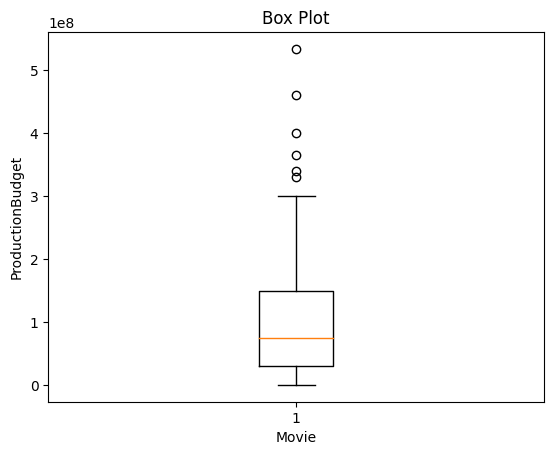

In [11]:
def clean_currency(value):
    if isinstance(value, str):
        return value.replace('$', '').replace(',', '').strip()
    return value
    
df['ProductionBudget']=df['ProductionBudget'].apply(clean_currency)
df['ProductionBudget']=df['ProductionBudget'].astype(int)
plt.boxplot(df['ProductionBudget'])
plt.xlabel('Movie')
plt.ylabel('ProductionBudget')
plt.title('Box Plot')
plt.show()

In [12]:

for col in df.select_dtypes(include=['number']).columns:
    mean = df[col].mean()
    std = df[col].std()
    
    Lower_Bound=mean-std*2
    Upper_Bound=mean+std*2

    print('Lower bound : ',Lower_Bound)
    print('Upper bound : ',Upper_Bound)
    df1=df[(df[col]>=Lower_Bound) & (df[col]<=Upper_Bound)]



Lower bound :  -63737017.73181938
Upper bound :  258029880.4769174
